There is also a first project to work on, based on the 311 service request data from Open data buffalo.   Most of the variables are categorical in nature,  the categories of major interest are probably

-Status, subject, reason, type, object type, council district, police district, neighborhood

-There is also a couple of date variables

It looks like status, subject, reason, type and object type might be interesting categorical variables.   Which of these can be described by a limited number of categories?  Which are not described easily as a limited number of outcomes

Figure out which of the outcomes fit into a limited number of categories, and then produce some graphs explaining how they are related to council district, police district, neighborhood.

Do different districts and/or neighborhoods tend to different numbers of 311 calls?

Do different months have different number of 311 reports?  What about different years?

This is a two week long project.   Show your results visually,    make sure everything is labeled clearly in your ipynb file.   Write a clear discussion of each finding and be sure the sections of the notebook are all clearly labeled.

Set up a repository for this project on GitHUB,   save your ipynb file there,  the pdf version  of the ipynb and also a ReadMe file describing the project

Turn in the pdf of your notebook and also a link to the repository on GitHub.

Upload the pdf version of the ipynb file.

What I am really looking for in this project is:

a.) Some interesting insights into 311 calls- search for at least one

b.) A clear visual demonstration of that insight

c.) Documentation of the use of GitHub

#Import Data, set up libraries and other options

In [462]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)

In [463]:
infile = "311_Service_Requests_20240221.csv"
df311 =pd.read_csv(infile)
df311.head()

<ipython-input-463-683123bb5431>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df311 =pd.read_csv(infile)


,Case Reference,Open Date,Closed Date,Status,Subject,Reason,Type,Object Type,Address Number,Address Line 1,Address Line 2,City,State,Zipcode,Property ID,Location,Latitude,Longitude,Council District,Council District 2011,Police District,Census Tract,Census Block Group,Census Block,Neighborhood,X Coordinate,Y Coordinate,2010 Census Tract,2010 Census Block Group,2010 Census Block,TRACTCE20,GEOID20_tract,GEOID20_blockgroup,GEOID20_block
0,514722,07/19/2010 12:06:00 PM,07/19/2010 02:15:00 PM,Closed,Dept of Public Works,Streets,Sweeper (Req_Serv),Street,NaN,RAMONA,NaN,Buffalo,NY,UNKNOWN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
1,1000802971,02/12/2018 06:47:00 AM,02/12/2018 10:33:00 AM,Closed,Buffalo Police Department,Police,Police Issue (Req_Serv),Street,NaN,Brinkman Ave,NaN,Buffalo,NY,UNKNOWN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
2,541218,01/11/2011 09:12:00 AM,01/26/2011 10:01:00 AM,Closed,Utilities,National Grid,Streetlights (Req_Serv),Street,NaN,CLIFF,NaN,Buffalo,NY,UNKNOWN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
3,1000708750,07/10/2017 11:36:00 AM,07/10/2017 02:27:00 PM,Closed,Dept of Public Works,Streets,Sweeper (Req_Serv),Street,NaN,SPRING,NaN,Buffalo,NY,UNKNOWN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
4,1000892866,08/18/2018 03:44:00 PM,08/20/2018 10:00:00 PM,Closed,Dept of Public Works,Forestry,Tree Planting Request (Req_Serv),Property,NaN,NaN,NaN,Buffalo,NY,UNKNOWN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN


#Understand the data I am dealing with

In [464]:
df311.shape

(1112730, 34)

Thats beefy

In [465]:
df311.columns

Index(['Case Reference', 'Open Date', 'Closed Date', 'Status', 'Subject',
       'Reason', 'Type', 'Object Type', 'Address Number', 'Address Line 1',
       'Address Line 2', 'City', 'State', 'Zipcode', 'Property ID', 'Location',
       'Latitude', 'Longitude', 'Council District', 'Council District 2011',
       'Police District', 'Census Tract', 'Census Block Group', 'Census Block',
       'Neighborhood', 'X Coordinate', 'Y Coordinate', '2010 Census Tract',
       '2010 Census Block Group', '2010 Census Block', 'TRACTCE20',
       'GEOID20_tract', 'GEOID20_blockgroup', 'GEOID20_block'],
      dtype='object')

In [466]:
df311.dtypes

Case Reference              object
Open Date                   object
Closed Date                 object
Status                      object
Subject                     object
Reason                      object
Type                        object
Object Type                 object
Address Number              object
Address Line 1              object
Address Line 2              object
City                        object
State                       object
Zipcode                     object
Property ID                 object
Location                    object
Latitude                   float64
Longitude                  float64
Council District            object
Council District 2011       object
Police District             object
Census Tract                object
Census Block Group          object
Census Block                object
Neighborhood                object
X Coordinate               float64
Y Coordinate               float64
2010 Census Tract           object
2010 Census Block Gr

In [467]:
df311.describe()

,Latitude,Longitude,X Coordinate,Y Coordinate
count,1.019924e+06,1.019924e+06,5.677520e+05,5.677520e+05
mean,4.299835e+01,-7.899725e+01,-7.135284e+06,4.525047e+06
std,1.296937e-02,2.080884e-02,3.614622e+06,1.711193e+06
min,4.283199e+01,-7.900000e+01,-8.784200e+06,-8.776799e+06
25%,4.300000e+01,-7.900000e+01,-8.779050e+06,5.290542e+06
50%,4.300000e+01,-7.900000e+01,-8.775132e+06,5.297801e+06
75%,4.300000e+01,-7.900000e+01,-8.772702e+06,5.301150e+06
max,4.300000e+01,-7.879899e+01,5.302890e+06,5.306748e+06


# Prepare my dat for Analysis with plots

I am going to keep Open Date to refernce Dates and the catagorical variables : Status, subject, reason, type, object typethen compare their relationship with council district, police district, neighborhood.

In [468]:
df311.columns

Index(['Case Reference', 'Open Date', 'Closed Date', 'Status', 'Subject',
       'Reason', 'Type', 'Object Type', 'Address Number', 'Address Line 1',
       'Address Line 2', 'City', 'State', 'Zipcode', 'Property ID', 'Location',
       'Latitude', 'Longitude', 'Council District', 'Council District 2011',
       'Police District', 'Census Tract', 'Census Block Group', 'Census Block',
       'Neighborhood', 'X Coordinate', 'Y Coordinate', '2010 Census Tract',
       '2010 Census Block Group', '2010 Census Block', 'TRACTCE20',
       'GEOID20_tract', 'GEOID20_blockgroup', 'GEOID20_block'],
      dtype='object')

1. Get rid of 'Case Reference' I want to understand a general tread
2. Keep open date to reference Dates remove closed dates
3. Status subject reason type and object type are useful for understanding a
general trend as they describe the nature of the call
4. I would like to understand the realtions of these variables to council
district, police district, neighborhood

In [469]:
working311 = df311[['Open Date','Status', 'Subject',
       'Reason', 'Type', 'Object Type', 'Council District',
       'Police District',
       'Neighborhood']]
working311.head()

,Open Date,Status,Subject,Reason,Type,Object Type,Council District,Police District,Neighborhood
0,07/19/2010 12:06:00 PM,Closed,Dept of Public Works,Streets,Sweeper (Req_Serv),Street,UNKNOWN,UNKNOWN,UNKNOWN
1,02/12/2018 06:47:00 AM,Closed,Buffalo Police Department,Police,Police Issue (Req_Serv),Street,UNKNOWN,UNKNOWN,UNKNOWN
2,01/11/2011 09:12:00 AM,Closed,Utilities,National Grid,Streetlights (Req_Serv),Street,UNKNOWN,UNKNOWN,UNKNOWN
3,07/10/2017 11:36:00 AM,Closed,Dept of Public Works,Streets,Sweeper (Req_Serv),Street,UNKNOWN,UNKNOWN,UNKNOWN
4,08/18/2018 03:44:00 PM,Closed,Dept of Public Works,Forestry,Tree Planting Request (Req_Serv),Property,UNKNOWN,UNKNOWN,UNKNOWN


In [470]:
working311.dtypes

Open Date           object
Status              object
Subject             object
Reason              object
Type                object
Object Type         object
Council District    object
Police District     object
Neighborhood        object
dtype: object

Lets figure out a way to change the data type of the Date to be a Date type in python.

They look like Datetime so import the libaries moduels. And convert it to date time.

In [471]:
from datetime import datetime

working311["Open Date"]=pd.to_datetime(working311["Open Date"])

<ipython-input-471-f6140a70ffc2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working311["Open Date"]=pd.to_datetime(working311["Open Date"])


In [472]:
working311.dtypes


Open Date           datetime64[ns]
Status                      object
Subject                     object
Reason                      object
Type                        object
Object Type                 object
Council District            object
Police District             object
Neighborhood                object
dtype: object

In [473]:
working311.shape

(1112730, 9)

In [474]:
working311.isna().sum()

Open Date              0
Status                 0
Subject                0
Reason                 0
Type                   0
Object Type            0
Council District    1797
Police District        0
Neighborhood           0
dtype: int64

This is such a small amount comapred to 1112730 I am just going to drop all the rows where Council District is null.

In [475]:
working311=working311.loc[~working311["Council District"].isna()]

In [476]:
working311.shape

(1110933, 9)

# Which variables have limited catagories?

In [477]:
working311.columns

Index(['Open Date', 'Status', 'Subject', 'Reason', 'Type', 'Object Type',
       'Council District', 'Police District', 'Neighborhood'],
      dtype='object')

In [478]:
len(working311.columns)

9

In [479]:
working311["Council District"].unique()

array(['UNKNOWN', 'LOVEJOY', 'FILLMORE', 'SOUTH', 'NORTH', 'NIAGARA',
       'DELAWARE', 'UNIVERSITY', 'MASTEN', 'ELLICOTT'], dtype=object)

In [480]:
len(working311["Council District"].unique())

10

####10 catagoreis, I am going to keep the "Unknown" catagory to account for all the unidentified values.


In [481]:
working311["Open Date"].unique()

array(['2010-07-19T12:06:00.000000000', '2018-02-12T06:47:00.000000000',
       '2011-01-11T09:12:00.000000000', ...,
       '2024-02-20T09:22:00.000000000', '2024-02-20T09:07:00.000000000',
       '2024-02-20T08:36:00.000000000'], dtype='datetime64[ns]')

In [482]:
len(working311["Open Date"].unique())

839254

##### This is not a catagorical variable as it continually increases as time goes on but I just wanted to obseve

In [483]:
working311["Status"].unique()

array(['Closed', 'Open'], dtype=object)

In [484]:
len(working311["Status"].unique())

2

In [485]:
working311["Subject"].unique()

array(['Dept of Public Works', 'Buffalo Police Department', 'Utilities',
       'DPIS', 'Assessment & Taxation', 'Dept of Parking',
       'Buffalo Municipal Housing Authority', 'Buffalo Fire Department',
       'City Clerk', 'Office of the Mayor',
       'Office of Strategic Planning', 'Dept of Law',
       'Community Services & Rec. Program.', 'New Americans',
       'Human Resources', 'Management Information Systems', 'Test',
       'Knowledge Management'], dtype=object)

In [486]:
len(working311["Subject"].unique())

18

This one is failry small I will see how my graphs looks.

In [487]:
working311["Reason"].unique()

array(['Streets', 'Police', 'National Grid', 'Forestry', 'Rodent Control',
       'Sanitation', 'Housing', 'Buffalo Sewer Authority',
       'Animal Shelter', 'City Parks', 'Taxation',
       'Buffalo Water Authority', 'Engineering - Street Repairs',
       'Parking Violations Bureau', 'BMHA', 'BFD', 'Licenses',
       'City Clerk Issue', 'Engineering - Traffic',
       'Citizen Services - Quick Response Teams',
       'Citizens Services - Clean City',
       'Citizen Services - Save Our Streets', 'Real Estate',
       'Moving Violations', 'Administration', 'Streets/Sanitation',
       'Citizen Services - Graffiti', 'Telecommunications',
       'Freedom of Information', 'Adjudication - Ordinance Violation',
       'Assessment & Taxation', 'Harbor Master', 'Personnel',
       'Community Based Orgs', 'Buildings Division', 'Immigration', 'HR',
       'OSP', 'COB APP Issues', 'Youth Bureau',
       'Citizen Services - Thrive Program', 'Rodent_Pest Control',
       'Citizen Services - Good 

In [488]:
len(working311["Reason"].unique())

51

This one is even larger but for a data set of a 1 million rows we can consider this to be a limited number of catagories.

In [489]:
working311["Type"].unique()

array(['Sweeper (Req_Serv)', 'Police Issue (Req_Serv)',
       'Streetlights (Req_Serv)', 'Tree Planting Request (Req_Serv)',
       'Rodents (Req_Serv)', 'Excess Trash (Req_Serv)',
       'Totes Replace (Req_Serv)', 'Tree Removal (Req_SERV)',
       'Housing Violations (Req_Serv)', 'Street Flooding (Req_Serv)',
       'Dead Animal Removal (Req_Serv)', 'Pest (Req_Serv)',
       'Totes Combo (Req_Serv)', 'Animals (Req_Serv)',
       'Snow Removal Inspection (Req_Serv)', 'Sewer (Req_Serv)',
       'City Parks (Req_Serv)', 'Recycling Missed Pick Up (Req_Serv)',
       'User Fee (Req_Serv)', 'Taxation Issue (Req_Serv)',
       'Tree Trimming Request (Req_Serv)', 'Bulk Trash (Req_Serv)',
       'Water (Req_Serv)', 'Street Snow Plowing (Req_Serv)',
       'Olmsted Parks (Req_Serv)', 'Garbage Missed Pick Up (Req_Serv)',
       'PW Vacant Lot (Req_Serv)', 'Pot Hole (Req_Serv)',
       'PVB Single Meter (Req_Serv)', 'Tree Other (Req_Serv)',
       'Recycling Tote Deliver (Req_Serv)',
       'Po

In [490]:
len(working311["Type"].unique())

223

Fairly large amount of catagories, however still limited when we look at this number next to the number of rows.


reference:'Police District', 'Neighborhood'

In [491]:
working311["Police District"].unique()

array(['UNKNOWN', 'District D', 'District A', 'District E', 'District B',
       'District C'], dtype=object)

In [492]:
len(working311["Police District"].unique())

6

In [493]:
working311["Neighborhood"].unique()

array(['UNKNOWN', 'Riverside', 'Hopkins-Tifft', 'South Park', 'Kenfield',
       'Black Rock', 'Schiller Park', 'Grant-Amherst', 'Elmwood Bryant',
       'Lovejoy', 'Fillmore-Leroy', 'First Ward', 'Elmwood Bidwell',
       'Central Park', 'Kaisertown', 'Fruit Belt', 'Broadway Fillmore',
       'Parkside', 'North Park', 'MLK Park', 'Genesee-Moselle',
       'West Side', 'Ellicott', 'Kensington-Bailey', 'Allentown',
       'West Hertel', 'Delavan Grider', 'Upper West Side',
       'Seneca-Cazenovia', 'Hamlin Park', 'Seneca Babcock',
       'Lower West Side', 'Masten Park', 'Pratt-Willert', 'Central',
       'University Heights'], dtype=object)

In [494]:
len(working311["Neighborhood"].unique())

36

In [495]:
len(working311["Object Type"].unique())

5

In [496]:
working311["Object Type"].unique()

array(['Street', 'Property', 'Individual', 'Unknown', 'Organisation'],
      dtype=object)

In [497]:
#Lets add a seperate year and month column
working311["Year"]=pd.DatetimeIndex(working311["Open Date"]).year
working311["Month"]=pd.DatetimeIndex(working311["Open Date"]).month

In [498]:
working311.shape

(1110933, 11)

#produce some graphs explaining how they are related to council district, police district, neighborhood.

In [499]:
working311.head()


,Open Date,Status,Subject,Reason,Type,Object Type,Council District,Police District,Neighborhood,Year,Month
0,2010-07-19 12:06:00,Closed,Dept of Public Works,Streets,Sweeper (Req_Serv),Street,UNKNOWN,UNKNOWN,UNKNOWN,2010,7
1,2018-02-12 06:47:00,Closed,Buffalo Police Department,Police,Police Issue (Req_Serv),Street,UNKNOWN,UNKNOWN,UNKNOWN,2018,2
2,2011-01-11 09:12:00,Closed,Utilities,National Grid,Streetlights (Req_Serv),Street,UNKNOWN,UNKNOWN,UNKNOWN,2011,1
3,2017-07-10 11:36:00,Closed,Dept of Public Works,Streets,Sweeper (Req_Serv),Street,UNKNOWN,UNKNOWN,UNKNOWN,2017,7
4,2018-08-18 15:44:00,Closed,Dept of Public Works,Forestry,Tree Planting Request (Req_Serv),Property,UNKNOWN,UNKNOWN,UNKNOWN,2018,8


Lets organize and remind myself what I should be comparing again.

Index(['Open Date', 'Status', 'Subject', 'Reason', 'Type', 'Object Type',
       'Council District', 'Police District', 'Neighborhood'],
      dtype='object')

'Status' 2, 'Subject' 18, 'Reason' 51, 'Type' 223, 'Object Type 5'


'Council District' 10, 'Police District'6, 'Neighborhood'36


Lets Just make sure they are

In [500]:
Compare_1 = working311.groupby("Police District").Type.value_counts(normalize=False)

In [501]:
Compare_1 = pd.DataFrame(Compare_1)
Compare_1

Type
Police District Type                                                
District A      Housing Violations (Req_Serv)                  26054
                Totes Replace (Req_Serv)                       21202
                Garbage Missed Pick Up (Req_Serv)               8530
                Pot Hole (Req_Serv)                             8124
                Recycling Missed Pick Up (Req_Serv)             6054
...                                                              ...
UNKNOWN         Tele-Engagement Citizen Services (Req_Serv)        1
                Tele-Engagement Community Services (Req_Serv)      1
                Tele-Engagement Police (Req_Serv)                  1
                Test2                                              1
                Weed & Seed Program (Req_Serv)                     1

[1085 rows x 1 columns]

In [502]:
Compare_1.loc['District A',:].sum()


Type    176476
dtype: int64

This would be hard to describe with a limited number of catagories.
It has a length of 1085 with 223 types and 6 police districts. Dealing with each catagory visually would be messy.

In [503]:
Compare_2 = working311.groupby("Police District").Reason.value_counts(normalize=False)

In [504]:
Compare_2 = pd.DataFrame(Compare_2)
Compare_2

Reason
Police District Reason                                             
District A      Sanitation                                    55622
                Housing                                       29475
                Engineering - Street Repairs                  17437
                Streets                                       15248
                Forestry                                       9511
...                                                             ...
UNKNOWN         Knowledge                                         4
                Citizens Services - BreakOut & Love Buffalo       2
                Citizen Services - Weed & Seed                    1
                Fair Housing                                      1
                Test                                              1

[266 rows x 1 columns]

I may try to graph this and see what tranpires. But I may just do away with it becuase it doesn't seem as though the outcomes fit easyly into a limited number of catagory for Reasons.

In [505]:
Compare_3 = working311.groupby("Police District").Status.value_counts(normalize=False)

In [506]:
Compare_3=pd.DataFrame(Compare_3)

Compare_3

Status
Police District Status        
District A      Closed  175801
                Open       675
District B      Closed  149414
                Open       698
District C      Closed  198554
                Open       786
District D      Closed  259651
                Open      1047
District E      Closed  230324
                Open       823
UNKNOWN         Closed   91945
                Open      1215

In [507]:

Compare_4 = working311.groupby("Police District")['Object Type'].value_counts(normalize=False)

In [508]:
Compare_4=pd.DataFrame(Compare_4)
Compare_4

Object Type
Police District Object Type              
District A      Property           168230
                Street               8246
District B      Property           150111
                Street                  1
District C      Property           199338
                Street                  2
District D      Property           260698
District E      Property           231147
UNKNOWN         Street              63145
                Property            17933
                Unknown              6838
                Individual           5092
                Organisation          152

In [509]:
Compare_5 = working311.groupby("Police District").Type.value_counts(normalize=False)

In [510]:
Compare_5 =pd.DataFrame(Compare_5)
Compare_5

Type
Police District Type                                                
District A      Housing Violations (Req_Serv)                  26054
                Totes Replace (Req_Serv)                       21202
                Garbage Missed Pick Up (Req_Serv)               8530
                Pot Hole (Req_Serv)                             8124
                Recycling Missed Pick Up (Req_Serv)             6054
...                                                              ...
UNKNOWN         Tele-Engagement Citizen Services (Req_Serv)        1
                Tele-Engagement Community Services (Req_Serv)      1
                Tele-Engagement Police (Req_Serv)                  1
                Test2                                              1
                Weed & Seed Program (Req_Serv)                     1

[1085 rows x 1 columns]

In [511]:
Compare_A2 = working311.groupby("Neighborhood").Reason.value_counts(normalize=False)

In [512]:
Compare_A2 =pd.DataFrame(Compare_A2)
Compare_A2

Reason
Neighborhood Reason                                  
Allentown    Sanitation                          5706
             Housing                             2901
             Engineering - Street Repairs        1853
             Parking Violations Bureau           1550
             Streets                             1420
...                                               ...
West Side    Community Based Orgs                   3
             Citizen Services - Good Neighbor       2
             Telecommunications                     2
             Fair Housing                           1
             OSP                                    1

[1362 rows x 1 columns]

In [513]:
Compare_A1 = working311.groupby("Neighborhood").Type.value_counts(normalize=False)

In [514]:
Compare_A1 = pd.DataFrame(Compare_A1)
Compare_A1

Type
Neighborhood Type                                             
Allentown    Housing Violations (Req_Serv)                1905
             Totes Replace (Req_Serv)                     1674
             Parking Issues (Req_Serv)                    1348
             Pot Hole (Req_Serv)                          1039
             Garbage Missed Pick Up (Req_Serv)             934
...                                                        ...
West Side    PVB School-Zone Camera Citations (Req_Serv)     1
             Pavement Markings Other (Req_Serv)              1
             Schools (Req_Serv)                              1
             Special Event Totes (Req_Serv)                  1
             Tree Removal Challenge (Req_Serv)               1

[5450 rows x 1 columns]

In [515]:
Compare_A5 = working311.groupby("Neighborhood").Type.value_counts(normalize=False)

In [516]:
Compare_A5 = pd.DataFrame(Compare_A5)
Compare_A5

Type
Neighborhood Type                                             
Allentown    Housing Violations (Req_Serv)                1905
             Totes Replace (Req_Serv)                     1674
             Parking Issues (Req_Serv)                    1348
             Pot Hole (Req_Serv)                          1039
             Garbage Missed Pick Up (Req_Serv)             934
...                                                        ...
West Side    PVB School-Zone Camera Citations (Req_Serv)     1
             Pavement Markings Other (Req_Serv)              1
             Schools (Req_Serv)                              1
             Special Event Totes (Req_Serv)                  1
             Tree Removal Challenge (Req_Serv)               1

[5450 rows x 1 columns]

In [517]:
Compare_A4 = working311.groupby("Neighborhood")['Object Type'].value_counts(normalize=False)

In [518]:
Compare_A4 = pd.DataFrame(Compare_A4)
Compare_A4

Object Type
Neighborhood       Object Type              
Allentown          Property            17515
Black Rock         Property            15937
Broadway Fillmore  Property            63542
                   Street                  1
Central            Property            16922
Central Park       Property            18995
Delavan Grider     Property            25309
Ellicott           Property             9125
Elmwood Bidwell    Property            47801
Elmwood Bryant     Property            30056
Fillmore-Leroy     Property            26772
First Ward         Property            10696
Fruit Belt         Property            13365
Genesee-Moselle    Property            45475
Grant-Amherst      Property            17429
Hamlin Park        Property            22920
Hopkins-Tifft      Property            29318
                   Street               8245
Kaisertown         Property            24106
Kenfield           Property            26241
Kensington-Bailey  Property            52308
Lovejoy            Property            39716
                   Street                  1
Lower West Side    Property            15962
                   Street                  1
MLK Park           Property            20450
Masten Park        Property            34905
North Park         Property            54754
Parkside           Property            25742
Pratt-Willert      Property            11889
Riverside          Property            37894
Schiller Park      Property            39938
Seneca Babcock     Property            15118
Seneca-Cazenovia   Property            30175
South Park         Property            48729
                   Street                  1
UNKNOWN            Street              63145
                   Property            16727
                   Unknown              6838
                   Individual           5092
                   Organisation          152
University Heights Property            38077
Upper West Side    Property            36746
West Hertel        Property            12497
West Side          Property            34306

In [519]:
Compare_A3 = working311.groupby("Neighborhood").Status.value_counts(normalize=False)

In [520]:
Compare_A3 = pd.DataFrame(Compare_A3)
Compare_A3

Status
Neighborhood      Status        
Allentown         Closed   17426
                  Open        89
Black Rock        Closed   15864
                  Open        73
Broadway Fillmore Closed   63309
...                          ...
Upper West Side   Open       145
West Hertel       Closed   12451
                  Open        46
West Side         Closed   34160
                  Open       146

[72 rows x 1 columns]

In [521]:
Compare_B2 = working311.groupby("Council District").Reason.value_counts(normalize=False)

In [522]:
Compare_B2 = pd.DataFrame(Compare_B2)
Compare_B2

Reason
Council District Reason                                             
DELAWARE         Sanitation                                     5346
                 Streets                                        2517
                 Housing                                        2202
                 Engineering - Street Repairs                   1967
                 Parking Violations Bureau                       988
...                                                              ...
UNKNOWN          Knowledge                                         5
                 ADA                                               2
                 Citizens Services - BreakOut & Love Buffalo       2
                 Immigration                                       2
                 Test                                              1

[352 rows x 1 columns]

In [523]:
Compare_B1 = working311.groupby("Council District").Type.value_counts(normalize=False)

In [524]:
Compare_B1 = pd.DataFrame(Compare_B1)

In [525]:
Compare_B1

Type
Council District Type                                               
DELAWARE         Totes Replace (Req_Serv)                       1420
                 Garbage Missed Pick Up (Req_Serv)              1264
                 Housing Violations (Req_Serv)                  1228
                 Street Snow Plowing (Req_Serv)                 1124
                 Pot Hole (Req_Serv)                            1108
...                                                              ...
UNKNOWN          Tele-Engagement Citizen Services (Req_Serv)       1
                 Tele-Engagement Community Services (Req_Serv)     1
                 Tele-Engagement Police (Req_Serv)                 1
                 Test2                                             1
                 Thruway (Req_Serv)                                1

[1442 rows x 1 columns]

In [526]:
Compare_B5 = working311.groupby("Council District").Type.value_counts(normalize=False)

In [527]:
Compare_B5 = pd.DataFrame(Compare_B5)

In [528]:
Compare_B5

Type
Council District Type                                               
DELAWARE         Totes Replace (Req_Serv)                       1420
                 Garbage Missed Pick Up (Req_Serv)              1264
                 Housing Violations (Req_Serv)                  1228
                 Street Snow Plowing (Req_Serv)                 1124
                 Pot Hole (Req_Serv)                            1108
...                                                              ...
UNKNOWN          Tele-Engagement Citizen Services (Req_Serv)       1
                 Tele-Engagement Community Services (Req_Serv)     1
                 Tele-Engagement Police (Req_Serv)                 1
                 Test2                                             1
                 Thruway (Req_Serv)                                1

[1442 rows x 1 columns]

In [529]:
Compare_B4 = working311.groupby("Council District")['Object Type'].value_counts(normalize=False)

In [530]:
Compare_B4 = pd.DataFrame(Compare_B4)

In [531]:
Compare_B4

Object Type
Council District Object Type              
DELAWARE         Property            17946
ELLICOTT         Property            21165
FILLMORE         Property            24398
LOVEJOY          Property            25279
                 Street               7343
MASTEN           Property            23363
NIAGARA          Property            20330
NORTH            Property            16527
SOUTH            Property            17246
UNIVERSITY       Property            18240
UNKNOWN          Property           842963
                 Street              64051
                 Unknown              6838
                 Individual           5092
                 Organisation          152

In [532]:
Compare_B3 = working311.groupby("Council District").Status.value_counts(normalize=False)

In [533]:
Compare_B3 = pd.DataFrame(Compare_B3)

In [534]:
Compare_B3

Status
Council District Status        
DELAWARE         Closed   17697
                 Open       249
ELLICOTT         Closed   20748
                 Open       417
FILLMORE         Closed   23897
                 Open       501
LOVEJOY          Closed   32219
                 Open       403
MASTEN           Closed   23060
                 Open       303
NIAGARA          Closed   20019
                 Open       311
NORTH            Closed   16172
                 Open       355
SOUTH            Closed   17012
                 Open       234
UNIVERSITY       Closed   17953
                 Open       287
UNKNOWN          Closed  916912
                 Open      2184

# Graph all these relationships except the ones containing Types

In [535]:
Compare_B3.drop(labels="UNKNOWN", axis=0)

Status
Council District Status        
DELAWARE         Closed   17697
                 Open       249
ELLICOTT         Closed   20748
                 Open       417
FILLMORE         Closed   23897
                 Open       501
LOVEJOY          Closed   32219
                 Open       403
MASTEN           Closed   23060
                 Open       303
NIAGARA          Closed   20019
                 Open       311
NORTH            Closed   16172
                 Open       355
SOUTH            Closed   17012
                 Open       234
UNIVERSITY       Closed   17953
                 Open       287

Graph the council district, police district, neighborhood vs status

In [536]:
Compare_B3 = Compare_B3.drop(labels="UNKNOWN", axis=0)

<Axes: xlabel='Council District,Status'>

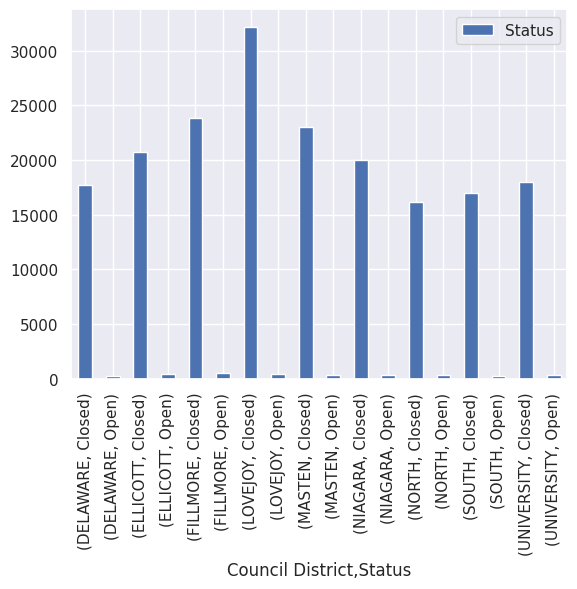

In [537]:
Compare_B3.plot(kind = 'bar')

I think thats preety, there semms to be very few cases that are open most have been clsoed. Among the closed cases the distribution is roughly uniform. Suggesting the 311 services are optimized to treat all neighbourhoods evenly. I droped the "Unknown" neighbourhood so we can see the impact of neighbourhood and whether or not cases are open or closed. Instead of having 916,000 unknown neighbourhood where we can't observe anything as they aren't identified.

In [538]:
Compare_3

Status
Police District Status        
District A      Closed  175801
                Open       675
District B      Closed  149414
                Open       698
District C      Closed  198554
                Open       786
District D      Closed  259651
                Open      1047
District E      Closed  230324
                Open       823
UNKNOWN         Closed   91945
                Open      1215

In [539]:
Compare_3= Compare_3.drop(labels="UNKNOWN", axis=0)

<Axes: xlabel='Police District,Status'>

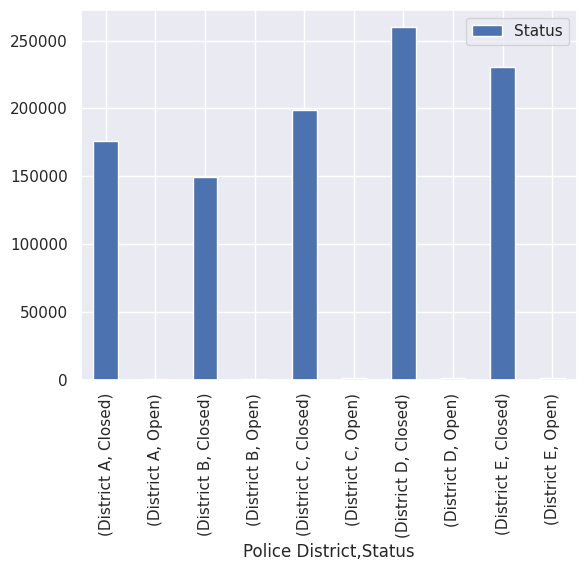

In [540]:
Compare_3.plot(kind = 'bar')

Districkt D seems to have more cases then others but once again police district and council district both semms to have roughly an evely distributed anounts of cases and closed cases.

In [541]:
# Lets do the smae for object Type and police district

Compare_4= Compare_4.drop(labels="UNKNOWN", axis=0)

In [542]:
Compare_4

Object Type
Police District Object Type             
District A      Property          168230
                Street              8246
District B      Property          150111
                Street                 1
District C      Property          199338
                Street                 2
District D      Property          260698
District E      Property          231147

<Axes: xlabel='Police District,Object Type'>

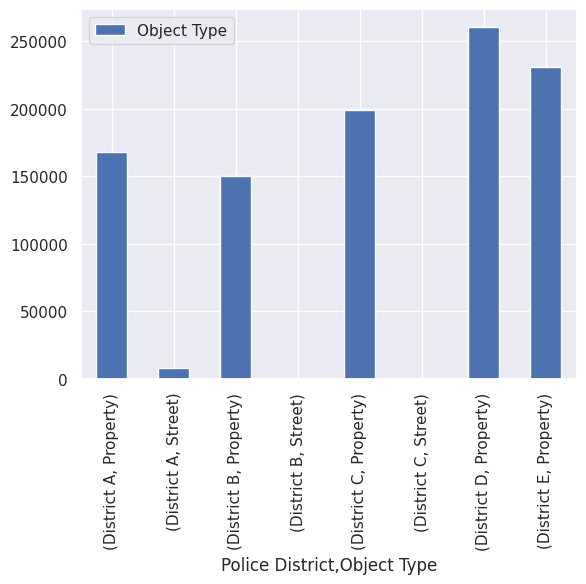

In [543]:
Compare_4.plot(kind = 'bar')

property D and E seems to have higher object type of Property, while only district A has any significat object

<Axes: xlabel='Council District,Object Type'>

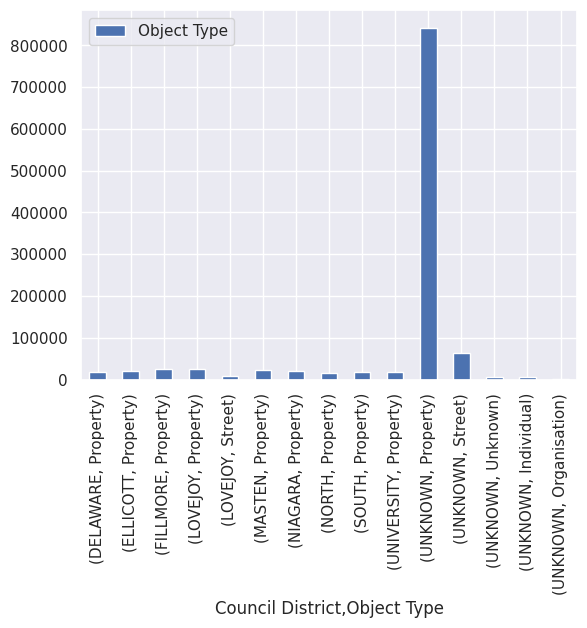

In [544]:
Compare_B4.plot(kind = 'bar')

Wanted to show why I am geting rid of it.

In [545]:
Compare_B4 = Compare_B4.drop(labels="UNKNOWN", axis=0)

<Axes: xlabel='Council District,Object Type'>

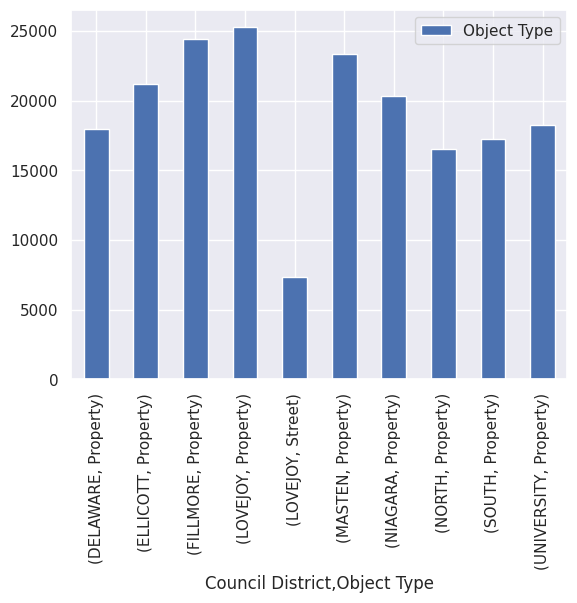

In [546]:
Compare_B4.plot(kind = 'bar')

Overall There semms to be a uniform distribution among the property object type of all the council district while only lovejoy has the stree object type.

# Do different districts and/or neighborhoods tend to different numbers of 311 calls?

We can simply stack all the neighborrd counts for each neighbor hood to figure this out.

<Axes: xlabel='Council District'>

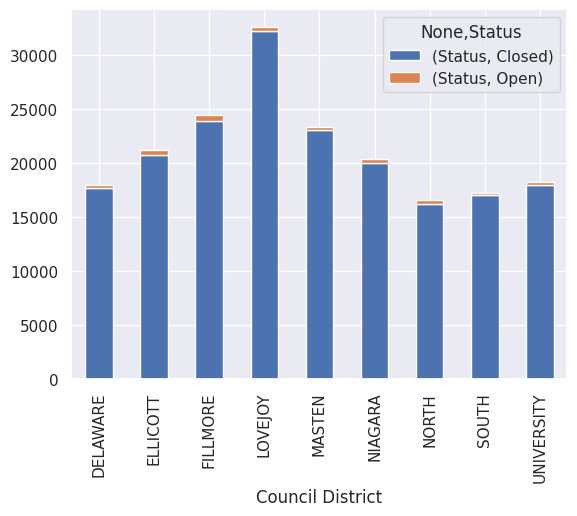

In [547]:
Compare_B3.unstack().plot(kind ='bar', stacked= True)

In [548]:
Compare_B3

Status
Council District Status        
DELAWARE         Closed   17697
                 Open       249
ELLICOTT         Closed   20748
                 Open       417
FILLMORE         Closed   23897
                 Open       501
LOVEJOY          Closed   32219
                 Open       403
MASTEN           Closed   23060
                 Open       303
NIAGARA          Closed   20019
                 Open       311
NORTH            Closed   16172
                 Open       355
SOUTH            Closed   17012
                 Open       234
UNIVERSITY       Closed   17953
                 Open       287

In [549]:
Compare_B3.columns.values.tolist()

['Status']

As seen here diffrent neighborood does indeed have diffrent number of calls. In the above cell we can also see where or not the case is closed or open.

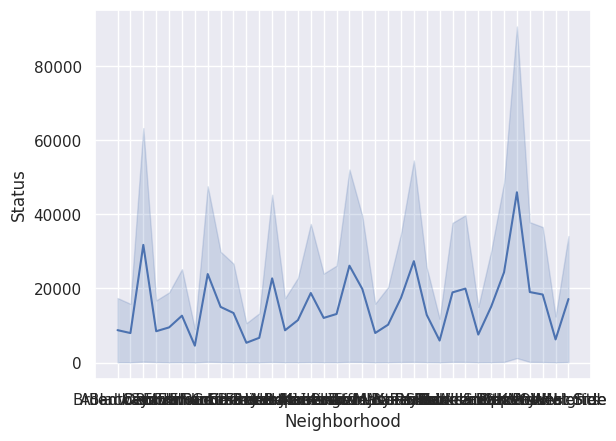

In [550]:


sns.set_theme(style="darkgrid")

ax = sns.lineplot(x="Neighborhood", y="Status", data=Compare_A3)

This may be a weird way of looking at it with a lineplot however as you can see there are diffrent peaks of varios diffrent levels, so difffrent neighbourhoods do tend to have diffrent amounts of 311 calls

I tried using other forms of plotting but this seems to be the best.

In [551]:
Compare_A3

Status
Neighborhood      Status        
Allentown         Closed   17426
                  Open        89
Black Rock        Closed   15864
                  Open        73
Broadway Fillmore Closed   63309
...                          ...
Upper West Side   Open       145
West Hertel       Closed   12451
                  Open        46
West Side         Closed   34160
                  Open       146

[72 rows x 1 columns]

#Do different months have different number of 311 reports? What about different years?

In [552]:
working311.head()

,Open Date,Status,Subject,Reason,Type,Object Type,Council District,Police District,Neighborhood,Year,Month
0,2010-07-19 12:06:00,Closed,Dept of Public Works,Streets,Sweeper (Req_Serv),Street,UNKNOWN,UNKNOWN,UNKNOWN,2010,7
1,2018-02-12 06:47:00,Closed,Buffalo Police Department,Police,Police Issue (Req_Serv),Street,UNKNOWN,UNKNOWN,UNKNOWN,2018,2
2,2011-01-11 09:12:00,Closed,Utilities,National Grid,Streetlights (Req_Serv),Street,UNKNOWN,UNKNOWN,UNKNOWN,2011,1
3,2017-07-10 11:36:00,Closed,Dept of Public Works,Streets,Sweeper (Req_Serv),Street,UNKNOWN,UNKNOWN,UNKNOWN,2017,7
4,2018-08-18 15:44:00,Closed,Dept of Public Works,Forestry,Tree Planting Request (Req_Serv),Property,UNKNOWN,UNKNOWN,UNKNOWN,2018,8


In [553]:
yearGroup = working311.groupby('Year').Neighborhood.value_counts()


In [554]:
yearGroup = pd.DataFrame(yearGroup)


In [555]:
yearGroup

Neighborhood
Year Neighborhood                   
2008 UNKNOWN                    3463
     Broadway Fillmore           913
     Genesee-Moselle             718
     West Side                   660
     Elmwood Bidwell             646
...                              ...
2024 Pratt-Willert               134
     First Ward                  121
     West Hertel                  95
     Ellicott                     91
     UNKNOWN                       1

[612 rows x 1 columns]

In [556]:
yearGroup.index.get_level_values(0).unique()

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019, 2020, 2021, 2022, 2023, 2024],
           dtype='int64', name='Year')

In [557]:
total_value_sum = yearGroup.groupby(level='Year')['Neighborhood'].sum()

In [558]:
total_value_sum = pd.DataFrame(total_value_sum)

In [559]:
total_value_sum

,Neighborhood
Year,
2008,17174
2009,60760
2010,54283
2011,62294
2012,57418
2013,60409
2014,73020
2015,83276
2016,71291


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Total Calls')]

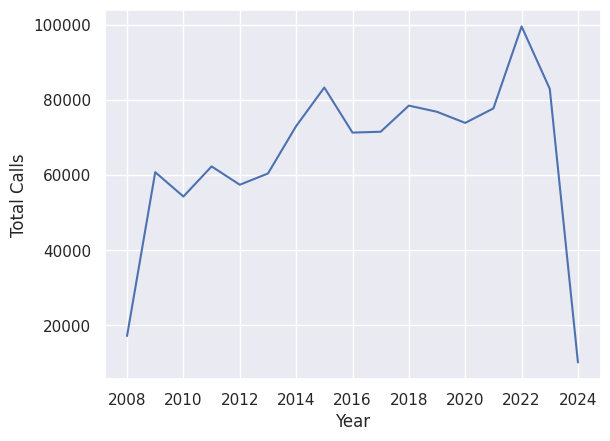

In [560]:
sns.set_theme(style="darkgrid")

ax = sns.lineplot(x="Year", y="Neighborhood", data=total_value_sum)
ax.set(xlabel='Year', ylabel='Total Calls')

The number decreases significantly at the end, that just means it's not a complete year from experience.

Lets do the same for the months

In [569]:
MonthGroup = working311.groupby('Month').Neighborhood.value_counts()

In [570]:
MonthGroup = pd.DataFrame(yearGroup)

In [571]:
total_value_sum2 = MonthGroup.groupby(level='Month')['Neighborhood'].sum()

In [572]:
total_value_sum2 = pd.DataFrame(total_value_sum2)

In [573]:
total_value_sum2

,Neighborhood
Month,
1,81670
2,78519
3,83694
4,84645
5,112100
6,118997
7,117839
8,115553
9,91784


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Total Calls')]

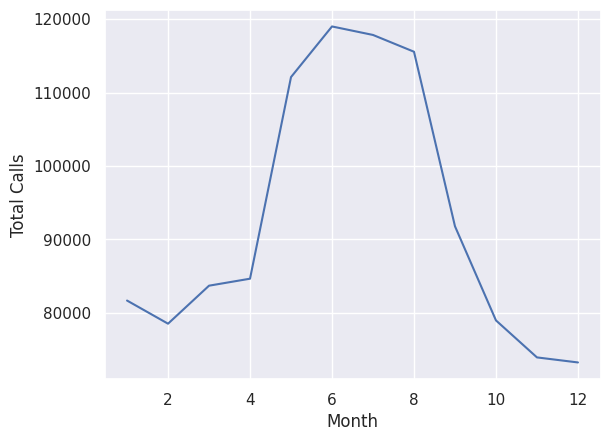

In [574]:
sns.set_theme(style="darkgrid")

ax = sns.lineplot(x='Month', y="Neighborhood", data=total_value_sum2)
ax.set(xlabel='Month', ylabel='Total Calls')

Seems like a normal sns.distribution for the ammount of calls per year.